<font size="3">

## **Some notes on the Statistics of AB testing**

### **AB tests are Binomial experiments, i.e., tests of proportions**

In experimentation, we're normally interested in **proportions**, i.e., the fraction of successes in a series of _independent_ (this is key) Bernoulli trials. Each Bernoulli trial involves a binary random variable $Y$ whose possible values are 1 ('click', success), with probability $p$, and 0 ('no click', failure), with probability $1 - p$. In the AB test, our quantity of interest is the **fraction of successes $\hat{p}$ ('p-hat') over the $n$ Bernoulli trials**. $\hat{p}$ is thus is a **Binomial** random variable, defined as

$\hat{p} = 1/n \sum_{i=1}^{n} Y_i$

Note that the fraction of successes $\hat{p}$ can also be understood as the mean number of successes per trial over the $n$ trials. As a mean, it's subject to the Central Limit Theorem, which says that if $n$ is sufficiently large, its sampling distribution will converge to the Normal distribution. On this basis, the Normal distribution can be used to build confidence intervals for $\hat{p}$. The condition for this is that $np \geq 15$ and $nq \geq 15$ (these thresholds vary among sources).

**NOTE**: Typically, a Binomial random variable $X$ is defined as the **number**, not the proportion, of successes over $n$ Bernoulli trials. However, in AB testing, it's perfectly normal to have a different $n$ for group A and group B, making it necessary to standardize results to a common base. That's why proportions instead of absolute numbers are used.

### **Expectation and variance of a Bernoulli trial**

As mentioned above, a Bernoulli random variable $Y$ can take on values of 1 (success), with probability $p$, or 0 (failure), with probability $1 - p$. Expectation and variance are:

$E(Y) = 1·p + 0·(1 - p)$

$\mathbf{\underline{E(Y) = p}}$

and 

$Var(Y) = E(Y^2) - [E(Y)]^2$

$Var(Y) = [1^2·p + 0^2·(1 - p)] - p^2$

$\mathbf{\underline{Var(Y) = p(1 - p)}}$

### **Expectation and variance in an AB test**

As mentioned above, in an AB test, the random variable of interest $\hat{p}$ represents the fraction of successes over $n$ Bernoulli trials, with $\hat{p}$ defined as $\hat{p} = (Y + Y + Y + ...)/n$. Expectation and variance of this random variable are:

$E(\hat{p}) = E[(Y + Y + Y + ...)/n]$

$E(\hat{p}) = [E(Y) + E(Y) + E(Y) + ...]/n$

$E(\hat{p}) = (p + p + p + ...)/n$

$\mathbf{\underline{E(\hat{p}) = p}}$

and

$Var(\hat{p}) = Var[(Y + Y + Y + ...)/n]$

$Var(\hat{p}) = Var(Y + Y + Y + ...)/n^2$

$Var(\hat{p}) = [Var(Y) + Var(Y) + Var(Y) + ...]/n^2$, given that the $n$ Bernoulli trials are assumed to be independent

$Var(\hat{p}) = nVar(Y)/n^2$

$Var(\hat{p}) = Var(Y)/n$

$\mathbf{\underline{Var(\hat{p}) = p(1 - p)/n}}$

Hence, the standard deviation is:

$\mathbf{\underline{sd(\hat{p}) = \sqrt{(p(1 - p)/n)}}}$

### **Hypothesis test for a single proportion**

Before moving into AB tests, let's look at a hypothesis test for a single proportion. In an AB test, we're comparing a control group (A) to a treatment group (B) to see whether the proportion of some quantity in group B is higher or lower than in group A. However, a simpler scenario is to test whether a proportion is smaller or greather than a specified value in the general population. That is, we're not comparing two groups but rather just checking whether our target population has a proportion of some quantity that is smaller or greater than some value we hypothesize. For instance, a medical company might be interested in testing whether they have 30% users above 40 years of age. This is a hypothesis test for a single proportion.

The hypothesis test would look like this:

$H_0: p = 0.3$

$H_a: p \gt 0.3$

To test this hypothesis, we need two things: our estimate of $p$, i.e., $\hat{p}$, and it's sampling distribution, so we can estimate probabilities. Now, say we took a sample of 200 users, 67 above 40 years old and 133 below. How would we test the above hypothesis?

As shown above, $E(\hat{p}) = p$. This means that $\hat{p}$ is an unbiased estimator of $p$, and it's reasonable to use it to estimate the true (population) proportion $p$. As defined above, $\hat{p} = 1/n \sum_{i=1}^{n} Y_i$. In our sample of 200 users, $\sum_{i=1}^{n} Y_i = 67$ (67 successes) and $n=200$. Hence,

$\hat{p} = 67/200 = \mathbf{\underline{0.335}}$



</font>

##### **The sampling distribution of $\hat{p}$**

As shown above, expectation and variance are for the sampling distribution of $X$ are $E(X) = p$ and $Var(X) = p(1 - p)/n$. In this case, we have

$E(X) = \hat{p} = 0.335$

$Var(X)$

Hence, the standard deviation is:

$\mathbf{\underline{sd(X) = \sqrt{(p(1 - p)/n)}}}$


Since, in this case, $np = 200\cdot0.335 = 67 > 15$, and $n(1-p) = 200\cdot(1-0.335) = 133 > 15$, we can assume the sampling distribution of $\hat{p}$ to be approximately normal. As defined above, 

At the same time, $E(X)$ can be understood as the **mean** number of successes per trial -> Central Limit Theorem -> for large enough samples, the sampling distribution of an average approaches normal, regardless of population distribution


In [260]:
200*(1-.335)

133.0

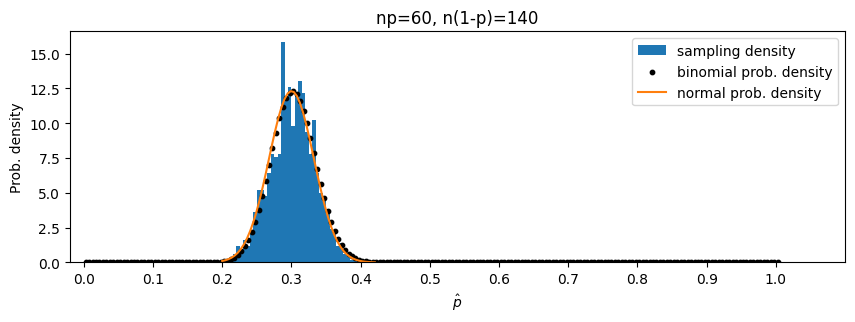

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# define parameters for Bernoulli trials
p = 0.3
possible_outcomes = [0, 1]

# no. of Bernoulli trials
n = 200

# no. of iterations to generate sampling distribution of phat
niterations = 1000

# run experiments
phat = list()
for _ in range(0, niterations):
    Y = np.random.choice(possible_outcomes, n, p=[1-p, p]) # generate n Bernoulli trials
    X = np.sum(Y) # compute no. of successes
    phat.append(X/n) # compute proportion of successes phat as mean no. of successes per trial

# make theoretical distributions: normal and binomial
norm_fx = stats.norm(loc=p, scale=np.sqrt(p*(1-p)/n)) # normal distr. with miu = p and sd = sqrt(p*(1-p)/n)
binom_px = stats.binom(n, p) # binomial distr. for no. successes (NOT proportion!)

# make x axis for plotting both distributions
x_norm = np.linspace(norm_fx.ppf(0.001), norm_fx.ppf(0.9999)) # use the distr. defined above to get quantiles ('ppf')
bin_width_X = 1 # bin width for no. of successes X
bin_width_phat = bin_width_X/n # scale X down to proportion of successes 
x_binom = np.arange(0, n+1, bin_width_X) # x axis for no. of successes X in n Bernoulli trials 
x_binom_phat = x_binom/n # scale above x axis down to proportion of successes 

# compute prob. density for both distributions
dnorm = norm_fx.pdf(x_norm) # density for normal distr.
dbinom = binom_px.pmf(x_binom)/bin_width_phat # density for binom. Since binom.pmf() gives probability mass, we divide it with bin_width to get density

# plot
fig, ax = plt.subplots(figsize=(10, 3))
ax.hist(phat, bins=x_binom_phat, density=True, label='sampling density')
ax.scatter(x_binom_phat + bin_width_phat/2, dbinom, color='black', s=10, label='binomial prob. density') # shift x-position of points to middle of bins
ax.plot(x_norm, dnorm, label='normal prob. density')
ax.set_xlabel(r'$\hat{p}$')
ax.set_ylabel('Prob. density')
ax.set_xlim(-0.02, 1.1)
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend()
ax.set_title(f'np={n*p:.0f}, n(1-p)={n*(1-p):.0f}')
plt.show()

In [255]:
200*0.55


110.00000000000001


n*p_hat >= 15
sd_phat = sqrt(p*(1-p)/n)
width of confidence interval w = z_alpha/2*sd_phat = z_alpha/2*sqrt(p*(1-p)/n)
phat +/- w = phat +/- z_alpha/2*sd_phat
sample size for specified w....
  w = z_alpha/2 * sqrt(p*(1-p)/n)
  n = (z_alpha/2)^2 * p*(1-p) / w^2
  p needs to be assumed from p_hat, or, conservatively, use p=0.5, which will 
  give an n on the safe side


wilson's adjustment for n*p < 15: add 2 to no. successes and 4 to n
phat ~ (x + 2)/(n+4)
sd_phat = sqrt(p_hat*(1-phat)/(n+4))


sensitivity of sqrt(pq) (table 7.6)

#### 

Large sample procedure, central limit theorem

(p 380)


### **Comparison of two proportions**

in ab test, we compare control group (A) with treatment group (B).for this, we use the statistical test for the difference of two proportions

(p 440)



w <- 0.01
alpha <- 0.1
p <- 0.1 # 0.5 too conservative
z <- qnorm(alpha/2, mean=0, sd=1, lower.tail=TRUE)
n <- z^2 * p*(1-p)/w^2


If we know the minimum effect size we want to detect, dmin, the desired power, and the significance, how do we determine the sample size n? 





dmin = 1
alpha = 0.05
beta = 0.00
power = 1.00


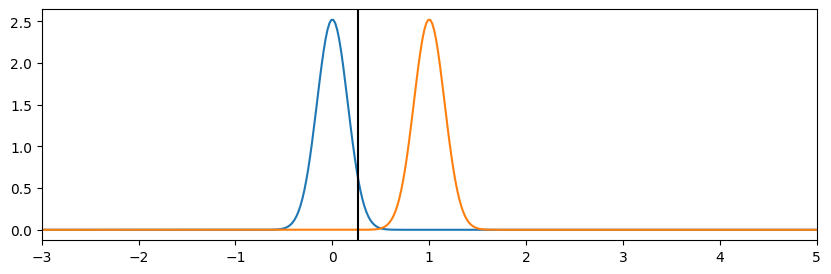

In [57]:
alpha = 0.05
x0 = 0
dmin = 1
xA = x0 + dmin

n = 100
sigma = 5
sd_xbar = sigma/np.sqrt(n)

x = np.linspace(-10, 10, 1000)

pdf_x0 = stats.norm(loc=x0, scale=sd_xbar)
pdf_xA = stats.norm(loc=xA, scale=sd_xbar)

fx0 = pdf_x0.pdf(x=x)
fxA = pdf_xA.pdf(x=x)

zcrit = pdf_x0.ppf(1 - 0.05)

beta = pdf_xA.cdf(zcrit)
power = 1 - beta

print(f'dmin = {dmin}')
print(f'alpha = {alpha}')
print(f'beta = {beta:.2f}')
print(f'power = {power:.2f}')

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(x, fx0)
ax.plot(x, fxA)
ax.set_xlim(-3, 5)
ax.axvline(x=zcrit, color='black')